In [2]:
#Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#load data, change directory to your corresponding directories
QC = pd.read_csv("C:/Users/cos00/Desktop/Nuclear/APAN5900/MI QC Data 09162019.csv")
tag = pd.read_csv("C:/Users/cos00/Desktop/Nuclear/APAN5900/Tag Data 09052019.csv")

In [4]:
np.shape(QC)  #dimension

(621974, 3)

In [5]:
np.shape(tag) #dimension

(474948, 59)

In [6]:
tag.describe()  #summary of tag data

,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,P1:Fc70302.AOT,P1:FC70309,P1:FC70310,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
count,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474948.000000,474780.000000,...,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000
mean,42566.267520,90.603056,37534.418031,13756.997247,6971.572492,6791.592072,77032.428407,49.605938,50022.377752,9193.291931,...,179.524201,184.061483,187.022822,187.071296,185.874510,188.214717,187.273341,186.489616,101.527905,95.652222
std,10658.907868,108.817466,17638.683105,4896.968277,1653.538575,1637.111213,30418.941971,16.071910,12837.758455,3189.873159,...,16.200895,14.981342,15.233879,14.819217,14.246953,15.047288,14.774859,14.825817,10.125880,10.844265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41723.002000,0.999998,28701.608250,9939.597900,6967.669800,6922.981175,61954.540250,44.740993,49082.496250,7081.801850,...,172.277630,180.106905,183.883030,184.119180,183.590360,185.166745,184.636825,183.762910,95.602245,90.484572
50%,45703.427500,9.985807,39237.012000,13275.303000,7082.420400,7059.809350,81876.031500,53.564054,52638.891000,9911.901850,...,181.373835,185.875085,188.834525,188.691445,187.391770,189.831160,188.690735,187.792045,101.586830,93.446106
75%,48067.617000,179.993150,49363.353250,17846.241000,7520.302400,7453.380625,97682.049000,59.155867,56175.150750,12102.039750,...,187.841037,190.180402,192.664470,192.287678,190.433252,193.394660,192.083102,191.225510,108.302113,101.834185
max,54140.277000,854.803280,119999.940000,44732.734000,13357.232000,18000.000000,189885.800000,100.000000,70509.445000,12200.000000,...,249.570950,242.760670,243.768840,250.000000,250.000000,250.000000,244.593190,234.901540,119.902320,136.239580


In [7]:
QC.describe() #summary of QC data

,SAMPLE_TIME,DETERMINANT,N_RESULT
count,621974,621974,620499
unique,619729,2,797
top,7/21/19 3:00 AM,ProdGrade,1203K
freq,2,619676,239471


In [8]:
QC.head() 

,SAMPLE_TIME,DETERMINANT,N_RESULT
0,8/1/18 3:00 AM,MI,3.535
1,8/1/18 7:00 AM,MI,3.053
2,8/1/18 11:00 AM,MI,3.051
3,8/1/18 3:00 PM,MI,3.121
4,8/1/18 7:00 PM,MI,3.35


In [9]:
tag.head()

,Time,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,P1:Fc70302.AOT,P1:FC70309,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
0,9/1/18 12:01 AM,38794.609,190.75885,24957.957,14851.066,8557.4453,8234.1465,76234.313,52.547276,57642.461,...,188.43633,192.51096,191.25912,195.41490,190.49413,195.98662,191.57228,188.17290,109.82582,93.186417
1,9/1/18 12:02 AM,39349.859,211.37585,27914.863,14821.011,8553.7354,8235.4736,76240.289,52.585453,57632.605,...,188.38400,192.46667,191.22163,195.39833,190.43701,195.92068,191.54037,188.06023,109.82489,93.182861
2,9/1/18 12:03 AM,39299.203,236.44901,26407.764,14790.954,8550.0254,8236.8008,76246.266,52.623631,57622.746,...,188.33170,192.42241,191.18413,195.38177,190.37990,195.85475,191.50848,187.94756,109.82396,93.179306
3,9/1/18 12:04 AM,39085.840,261.52216,25929.623,14760.897,8546.3154,8238.1279,76252.242,52.661804,57612.891,...,188.27939,192.37813,191.14664,195.36520,190.32278,195.78882,191.47658,187.83487,109.82303,93.175743
4,9/1/18 12:05 AM,38872.480,286.59531,25934.773,14730.841,8542.6045,8239.4551,76258.227,52.699982,57603.035,...,188.22707,192.33385,191.10913,195.34863,190.26567,195.72289,191.44469,187.72220,109.82209,93.172188


In [11]:
#NAs
QC.isna().sum() #1475 na values

SAMPLE_TIME       0
DETERMINANT       0
N_RESULT       1475
dtype: int64

In [12]:
tag.isna().sum()

Time                    0
P1:FC70104            168
P1:FC70113            168
P1:FC70116            168
P1:FC70117            168
P1:FC70120            168
P1:FC70121            168
P1:FC70302            168
P1:Fc70302.AOT        168
P1:FC70309              0
P1:FC70310            168
P1:FCV70111           168
P1:FFC70106           168
P1:FFC70113           168
P1:FFC70118           168
P1:FFC70119           168
P1:FI70402            168
P1:FR70106            168
P1:FR70119            168
P1:FR70303            168
P1:LC70104            168
P1:LC70104.PID        168
P1:PI70123            168
P1:PI70136            168
P1:PR70200            168
P1:PRS70108           168
P1:PRS70108.PID       168
P1:QI70402A           168
P1:QIA701001          168
P1:QIA701002          168
P1:QIA701003          168
P1:QIA701004          168
P1:QIA701005          168
P1:R700ACT            168
P1:R700ACT-Average    168
P1:R700RECYCLEB       168
P1:R700RECYCLET       168
P1:SI/TI-700-MVG      168
P1:TC70311  

In [13]:
#retrieve rows with null value
tag[tag.isnull().any(axis=1)] #168 rows, and it seems that these rows have na for most columns

,Time,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,P1:Fc70302.AOT,P1:FC70309,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
420439,6/20/19 12:20 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.017941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420440,6/20/19 12:21 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.064842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420441,6/20/19 12:22 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.111740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420442,6/20/19 12:23 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.158638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420443,6/20/19 12:24 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.205540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420444,6/20/19 12:25 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.252438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420445,6/20/19 12:26 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.299335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420446,6/20/19 12:27 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.346237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420447,6/20/19 12:28 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.393135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420448,6/20/19 12:29 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.440033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


D:\Anacoda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
D:\Anacoda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

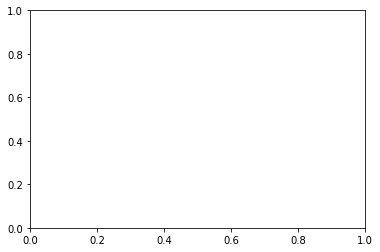

In [14]:
#plot 

#Histogram
plt.hist(tag.iloc[:,1])

(array([2.30110e+04, 8.17000e+02, 1.31950e+04, 2.66446e+05, 1.71029e+05,
        1.79000e+02, 6.10000e+01, 2.80000e+01, 7.00000e+00, 7.00000e+00]),
 array([    0.,  1800.,  3600.,  5400.,  7200.,  9000., 10800., 12600.,
        14400., 16200., 18000.]),
 <a list of 10 Patch objects>)

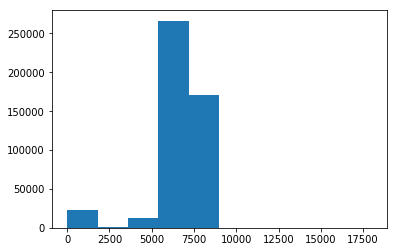

In [45]:
plt.hist(tag.iloc[:,6])